In [5]:
import math
import scipy.integrate as integrate
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
import csv
from scipy.ndimage import gaussian_filter
from scipy.stats import norm
from scipy.integrate import nquad

In [6]:
h = 6.626e-34
Gamma = 45e-6
Deltas = 1.8e-3
Deltat = 1.8e-3
T = 4.5
kb = 8.6e-5
ec = 1.6e-19
Echigh = (.016e-6)/4
Eclow = (0.32e-3)/4

In [7]:
def TipDOS(nrg): 
    return (np.sign(nrg)*nrg/(np.sqrt(nrg**2 + 2*1j*Gamma*nrg - Deltat**2))).real
def SamDOS(nrg): 
    return (np.sign(nrg)*nrg/(np.sqrt(nrg**2 + 2*1j*Gamma*nrg - Deltas**2))).real
def ferm(nrg):
    return 1/(np.exp(nrg/(kb*T)) + 1)
def PN85(En, Ec):
    return (1/np.sqrt(4*np.pi*Ec*kb*T))*np.exp(-(En - Ec)**2/(4*Ec*kb*T))
#def PN85high(En):
#    return (1/np.sqrt(4*np.pi*Echigh*kb*T))*np.exp(-(En - Echigh)**2/(4*Echigh*kb*T))

In [73]:
u = -1*np.ones(5,dtype=complex)
np.sqrt(u)

array([0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j])

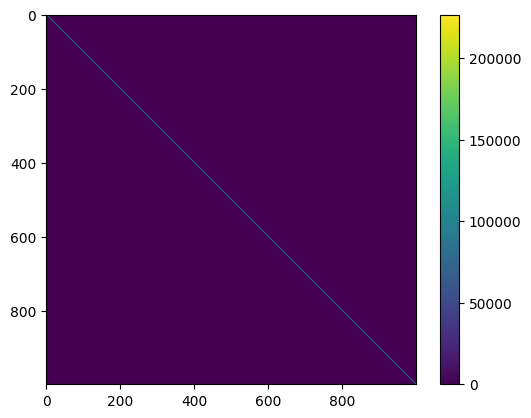

In [70]:
# define meshgrid on which to evaluate the integrand
x_values = np.linspace(-10e-3, 10e-3, 1000)
y_values = np.linspace(-10e-3, 10e-3, 1000)
X,Y = np.meshgrid(x_values, y_values)
plt.imshow(PN85(X-Y,Echigh))
plt.colorbar()

In [35]:
V = 4e-6
result = TipDOS(X) * SamDOS(Y + V) * (ferm(X) * (1 - ferm(Y + V)) - (1 - ferm(X)) * ferm(Y + V)) * PN85(X - Y, Eclow)

In [36]:
dx = dy = x_values[1] - x_values[0]
dX = np.full(len(x_values),dx)
dY = np.full(len(x_values),dy)

In [39]:
np.dot(np.dot(result,dX),dY)

-4.515912357367684e-06

In [52]:
pts = 100
IV_Eclow = np.zeros(pts)
V_values = np.linspace(-0.01, 0.01, pts)
for i,V in enumerate(V_values):
    integrand = TipDOS(X) * SamDOS(Y + V) * (ferm(X) * (1 - ferm(Y + V)) - (1 - ferm(X)) * ferm(Y + V)) * PN85(X - Y, Eclow)
    IV_Eclow[i] = np.dot(np.dot(integrand,dX),dY)

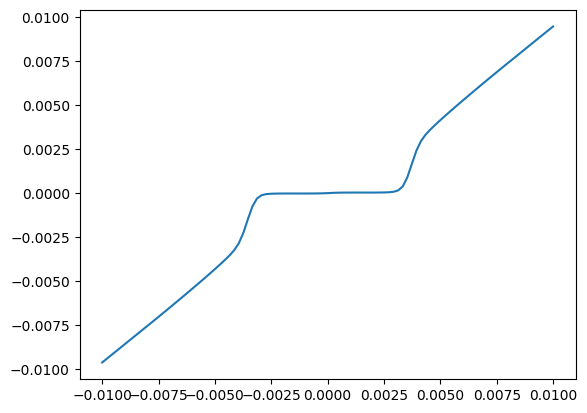

In [53]:
plt.plot(V_values, IV_Eclow)

In [54]:
pts = 100
IV_Echigh = np.zeros(pts)
for i,V in enumerate(V_values):
    integrand = TipDOS(X) * SamDOS(Y + V) * (ferm(X) * (1 - ferm(Y + V)) - (1 - ferm(X)) * ferm(Y + V)) * PN85(X - Y, Echigh)
    IV_Echigh[i] = np.dot(np.dot(integrand,dX),dY)

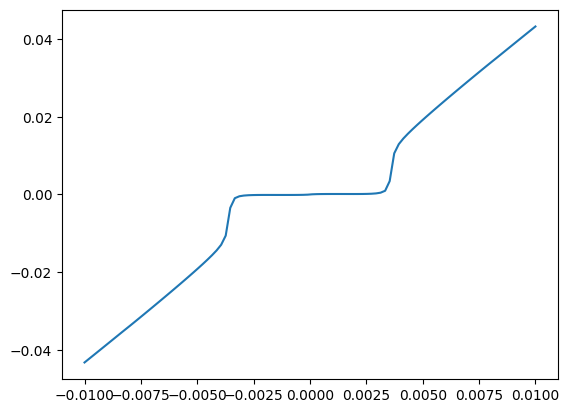

In [56]:
plt.plot(V_values, IV_Echigh)

In [62]:
pts = 100
IV_Echigh266 = np.zeros(pts)
for i,V in enumerate(V_values):
    integrand = TipDOS(X) * SamDOS(Y + V) * (ferm(X) * (1 - ferm(Y + V)) - (1 - ferm(X)) * ferm(Y + V)) * PN85(X - Y, Echigh*266)
    IV_Echigh266[i] = np.dot(np.dot(integrand,dX),dY)

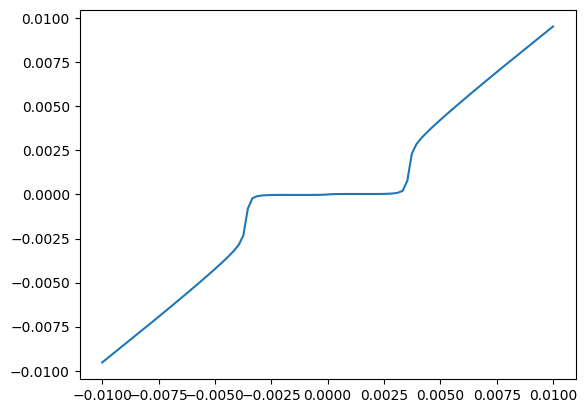

In [63]:
plt.plot(V_values, IV_Echigh266)

In [64]:
dV = V_values[1] - V_values[0]
dIdV_Eclow = [(IV_Eclow[i+1]-IV_Eclow[i])/dV for i in range(pts-1)]
dIdV_Echigh = [(IV_Echigh[i+1]-IV_Echigh[i])/dV for i in range(pts-1)]
dIdV_Echigh266 = [(IV_Echigh266[i+1]-IV_Echigh266[i])/dV for i in range(pts-1)]

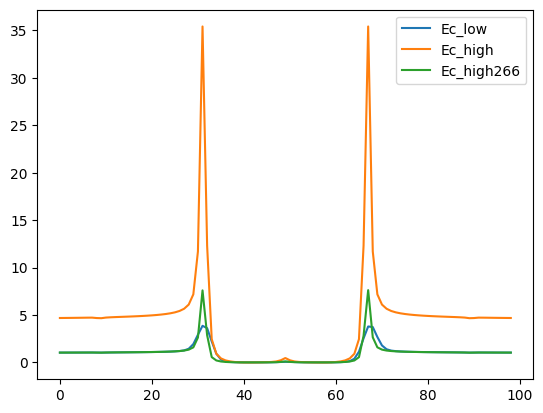

In [65]:
plt.plot(dIdV_Eclow,label='Ec_low')
plt.plot(dIdV_Echigh,label='Ec_high')
plt.plot(dIdV_Echigh266,label='Ec_high266')
plt.legend()

In [24]:
V = 4e-6
x_values = np.linspace(-10e-3, 10e-3, 1000)
samDOS_values = [SamDOS(x+V) for x in x_values]
tipDOS_values = [TipDOS(x) for x in x_values]
ferm_values = [ferm(x) for x in x_values]
fermminus_values = [1-ferm(x) for x in x_values]
fermV_values = [ferm(x+V) for x in x_values]
fermVminus_values = [1-ferm(x+V) for x in x_values]
PN_values = [PN85(x,Echigh) for x in x_values]

In [25]:
IV=[]
dx = x_values[1] - x_values[0]
for j in range(len(x_values)):
    V=x_values[j]
    samDOS_values = [SamDOS(x+V) for x in x_values]
    fermV_values = [ferm(x+V) for x in x_values]
    fermVminus_values = [1-ferm(x+V) for x in x_values]
    #PN_values = [PN85(x,Echigh) for x in x_values]
    IV_iter=[]
    for i in range(len(x_values)):
        integrand = tipDOS_values[i]*fermVminus_values[i]-fermminus_values[i]*fermV_values[i]
        IV_iter.append(integrand)
    IV.append(np.sum(IV_iter)*dx)

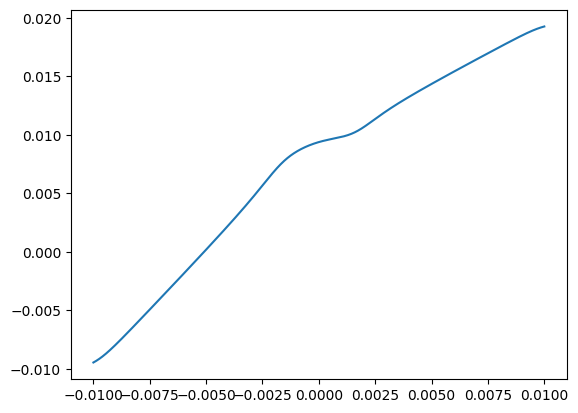

In [26]:
plt.plot(x_values,IV)

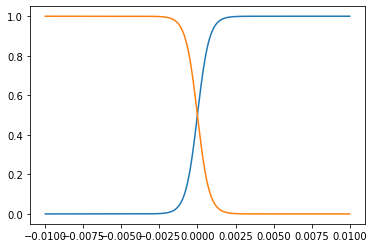

In [46]:
plt.plot(x_values, fermVminus_values)
plt.plot(x_values, fermV_values)

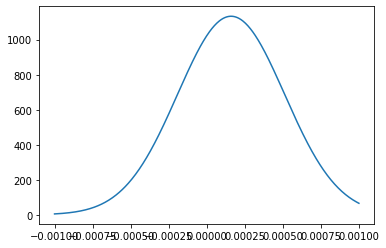

In [86]:
w_range = np.linspace(-1e-3, 1e-3, 500)
PN_values = [PN85(w_range,Echigh*10000) for w in w_range]

plt.plot(w_range, PN_values[1])

In [67]:
def integrand(x, y, V):
    return (
        TipDOS(x)
        * SamDOS(y + V)
        * (ferm(x) * (1 - ferm(y + V)) - (1 - ferm(x)) * ferm(y + V))
        * PN85(x-y,Eclow) )

In [68]:
x_lower, x_upper = -0.1, 0.1
y_lower, y_upper = -0.1, 0.1

In [69]:
def Iv5(V):
    x_values = np.linspace(x_lower, x_upper, 100)
    y_values = np.linspace(y_lower, y_upper, 100)
    integral = 0.0
    for x in x_values:
        for y in y_values:
            integral += integrand(x, y, V)
    return integral * (x_upper - x_lower) * (y_upper - y_lower) / (100**2)

In [70]:
z_values = np.linspace(-0.01, 0.01, 100)
Iv4_values = [Iv4(z) for z in z_values]

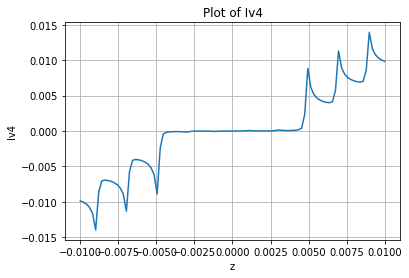

In [71]:
plt.plot(z_values, Iv4_values)
plt.xlabel('z')
plt.ylabel('Iv4')
plt.title('Plot of Iv4')
plt.grid(True)
plt.show()

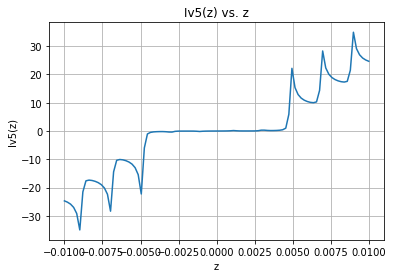

In [72]:
def Iv5(V):
    x_values = np.linspace(-0.1, 0.1, 100)
    y_values = np.linspace(-0.1, 0.1, 100)
    integral = 0.0

    for x in x_values:
        for y in y_values:
            integral += (
                TipDOS(x) *
                SamDOS(y + V) *
                (ferm(x) * (1 - ferm(y + V)) - (1 - ferm(x)) * ferm(y + V)) *
                PN85(x - y, Eclow)
            )

    return integral * 0.1 * 0.1  # Multiply by the step size for both x and y

# Create an array of z values for plotting
z_values = np.linspace(-0.01, 0.01, 100)

# Calculate Iv5 for each z value
iv5_values = [Iv5(z) for z in z_values]

# Plot Iv5
plt.plot(z_values, iv5_values)
plt.xlabel('z')
plt.ylabel('Iv5(z)')
plt.title('Iv5(z) vs. z')
plt.grid(True)
plt.show()

/anaconda3/lib/python3.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


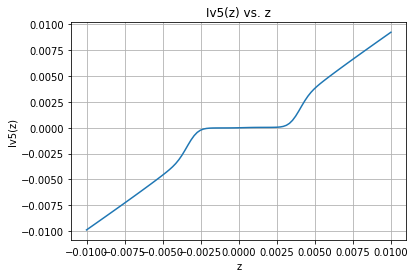

In [76]:
def Iv5(V):
    def integrand(x, y):
        return (
            TipDOS(x) * SamDOS(y + V) * (ferm(x) * (1 - ferm(y + V)) - (1 - ferm(x)) * ferm(y + V)) * PN85(x - y, Eclow)
        )

    result, _ = nquad(integrand, [(-0.1, 0.1), (-0.1, 0.1)]) #, opts={'minrecursion': 9}
    return result

# Create an array of z values for plotting
z_values = np.linspace(-0.01, 0.01, 100)

# Calculate Iv5 for each z value
iv5_values = [Iv5(z) for z in z_values]

# Plot Iv5
plt.plot(z_values, iv5_values)
plt.xlabel('z')
plt.ylabel('Iv5(z)')
plt.title('Iv5(z) vs. z')
plt.grid(True)
plt.show()

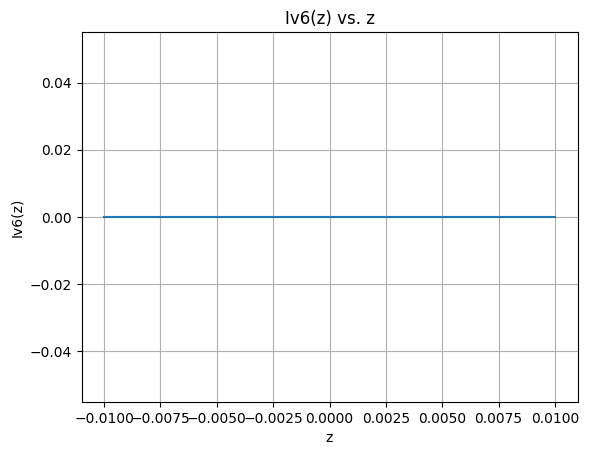

In [17]:
def Iv6(V):
    def integrand(x, y):
        return (
            TipDOS(x) * SamDOS(y + V) * (ferm(x) * (1 - ferm(y + V)) - (1 - ferm(x)) * ferm(y + V)) * PN85(x - y, Echigh*10000)
        )

    result, _ = nquad(integrand, [(-0.1, 0.1), (-0.1, 0.1)]) #, opts={'minrecursion': 9}
    return result

# Create an array of z values for plotting
z_values = np.linspace(-0.01, 0.01, 100)

# Calculate Iv5 for each z value
iv6_values = [Iv6(z) for z in z_values]

# Plot Iv6
plt.plot(z_values, iv6_values)
plt.xlabel('z')
plt.ylabel('Iv6(z)')
plt.title('Iv6(z) vs. z')
plt.grid(True)
plt.show()

In [10]:
nquad?

Signature: nquad(func, ranges, args=None, opts=None, full_output=False)
Docstring:
Integration over multiple variables.

Wraps `quad` to enable integration over multiple variables.
Various options allow improved integration of discontinuous functions, as
well as the use of weighted integration, and generally finer control of the
integration process.

Parameters
----------
func : {callable, scipy.LowLevelCallable}
    The function to be integrated. Has arguments of ``x0, ... xn``,
    ``t0, ... tm``, where integration is carried out over ``x0, ... xn``,
    which must be floats.  Where ``t0, ... tm`` are extra arguments
    passed in args.
    Function signature should be ``func(x0, x1, ..., xn, t0, t1, ..., tm)``.
    Integration is carried out in order.  That is, integration over ``x0``
    is the innermost integral, and ``xn`` is the outermost.

    If the user desires improved integration performance, then `f` may
    be a `scipy.LowLevelCallable` with one of the signatures::

     

/anaconda3/lib/python3.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


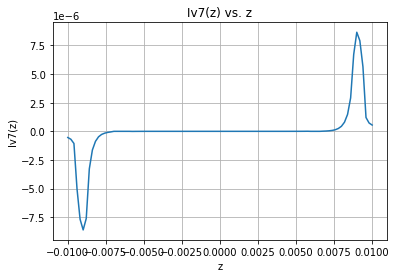

In [91]:
def Iv7(V):
    def integrand(x, y):
        return (
            TipDOS(x) * SamDOS(y + V) * (ferm(x) * (1 - ferm(y + V)) - (1 - ferm(x)) * ferm(y + V)) * PN85(x - y, Echigh*1000)
        )

    result, _ = nquad(integrand, [(-0.1, 0.1), (-0.1, 0.1)], opts={'limit': 500}) #, opts={'minrecursion': 9}
    return result

# Create an array of z values for plotting
z_values = np.linspace(-0.01, 0.01, 100)

# Calculate Iv5 for each z value
iv7_values = [Iv7(z) for z in z_values]

# Plot Iv7
plt.plot(z_values, iv7_values)
plt.xlabel('z')
plt.ylabel('Iv7(z)')
plt.title('Iv7(z) vs. z')
plt.grid(True)
plt.show()

In [68]:
np.sqrt(-1.0+0j)

1j